In [30]:
import pandas as pd

In [31]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [32]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].map(lambda x: int(x[1:].replace(",","")))

In [33]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].map(lambda x: int(x[1:].replace(",","")))

In [34]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].map(lambda x: int(x[1:].replace(",","")))

In [37]:
movie_budgets["domestic_profit"] = movie_budgets["domestic_gross"] - movie_budgets["production_budget"]

In [48]:
movie_budgets["worldwide_profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

In [54]:
movie_budgets["domestic_roi"] = movie_budgets["domestic_profit"]/movie_budgets['production_budget']

In [55]:
movie_budgets["worldwide_roi"] = movie_budgets["worldwide_profit"]/movie_budgets["production_budget"]

In [56]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,worldwide_roi,domestic_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,5.532577,0.789430
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,1.546673,-0.412899
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.572108,-0.877822
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,3.243841,0.388403
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,3.153696,0.956408
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,-1.000000,-1.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482,234495,39.082500,7.080333
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-3662,-0.732400,-0.732400
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1400,-1.000000,-1.000000


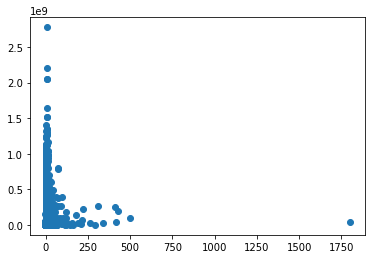

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

x=movie_budgets["worldwide_roi"]
y=movie_budgets['worldwide_gross']
fig, ax = plt.subplots()

ax.scatter(x, y)

In [58]:
movie_budgets['domestic_roi'].describe()

count    5782.000000
mean        1.983540
std        26.086591
min        -1.000000
25%        -0.794367
50%        -0.121674
75%         1.058148
max      1799.000000
Name: domestic_roi, dtype: float64

In [43]:
reviews = pd.read_csv('unzippedData/rt.reviews.tsv', sep='\t',encoding = "ISO-8859-1")
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [41]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
# Defining top performing movies 
    # highest grossing and highest ROI

# action: clean, filter, analyze this dataset



# get the list of top genres (and actors, directors, studios, writers) based on this new dataset created 
    # look back on other (top_critic=1,  i.e. rating >4)
    
# also looking into movies performing poorly